<a href="https://colab.research.google.com/github/Akshay-S-12/Transfer_Learning-Mask_Prediction-/blob/main/Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
IMAGE_SIZE=[224,224] #input image size



In [ ]:
train_path='/content/drive/MyDrive/Maskdata'
test_path='/content/drive/MyDrive/Maskdatatest'

In [ ]:
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
#must do
for layer in vgg.layers:
  layer.trainable=False


In [ ]:
#i/p==>convolutional layer===>pooling layer===>flatten
#vgg.output (predefined variable)

In [ ]:
#output
x=Flatten()(vgg.output)
prediction=Dense(2,activation='softmax')(x)


In [ ]:
model=Model(inputs=vgg.input,outputs=prediction)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,865,224 (56.71 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 100,358 (392.03 KB)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)
training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')
test_set=test_datagen.flow_from_directory(test_path,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 3150 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


In [ ]:
r=model.fit(training_set,validation_data=test_set,epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
84/99 ━━━━━━━━━━━━━━━━━━━━ 2:44 11s/step - accuracy: 0.8621 - loss: 0.3144

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


99/99 ━━━━━━━━━━━━━━━━━━━━ 1198s 12s/step - accuracy: 0.8722 - loss: 0.2940 - val_accuracy: 0.9412 - val_loss: 0.1985
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 56s 569ms/step - accuracy: 0.9522 - loss: 0.1138 - val_accuracy: 0.9902 - val_loss: 0.0676
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 57s 573ms/step - accuracy: 0.9801 - loss: 0.0574 - val_accuracy: 1.0000 - val_loss: 0.0152
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 57s 575ms/step - accuracy: 0.9861 - loss: 0.0345 - val_accuracy: 1.0000 - val_loss: 0.0151
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 58s 579ms/step - accuracy: 0.9914 - loss: 0.0253 - val_accuracy: 1.0000 - val_loss: 0.0093


In [ ]:
r.history

{'accuracy': [0.9253968000411987,
  0.9612698554992676,
  0.9828571677207947,
  0.9838095307350159,
  0.9917460083961487],
 'loss': [0.18764613568782806,
  0.10188522934913635,
  0.050600018352270126,
  0.0381058007478714,
  0.026676753535866737],
 'val_accuracy': [0.9411764740943909, 0.9901960492134094, 1.0, 1.0, 1.0],
 'val_loss': [0.19846214354038239,
  0.06764347106218338,
  0.015230193734169006,
  0.015136128291487694,
  0.009307327680289745]}

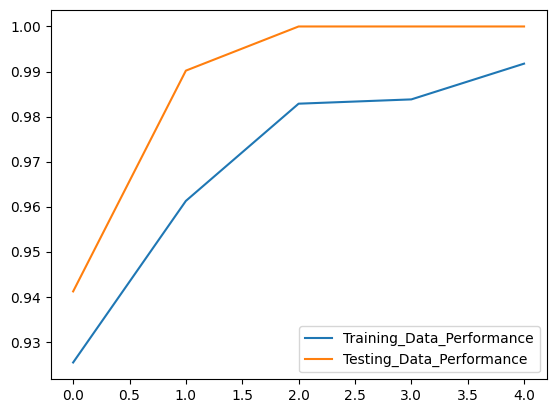

In [ ]:
plt.plot(r.history['accuracy'],label='Training_Data_Performance')
plt.plot(r.history['val_accuracy'],label='Testing_Data_Performance')
plt.legend()
plt.show()

In [ ]:
#to save model
model.save('Model_Transfer_Learning.h5')

In [ ]:
from skimage.io import imread
from skimage.transform import resize

In [ ]:
def predict(imagepath,model):
  img=imread(imagepath)
  img1=resize(img,(224,224))
  img1=img1.reshape(1,224,224,3)
  pred=model.predict(img1)
  ind=pred.argmax()
  datadir=['without_mask','with_mask']
  datadir.sort()
  print(datadir[ind])

In [ ]:
imagepath='/content/drive/MyDrive/Maskdata/with_mask/with_mask_1227.jpg'
predict(imagepath,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
with_mask


In [ ]:
imagepath='/content/drive/MyDrive/Maskdata/without_mask/without_mask_1003.jpg'
predict(imagepath,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
without_mask
